In [1]:
from sklearn.datasets import load_iris
dataset = load_iris()
data = dataset.data
target = dataset.target

In [2]:
import numpy as np
import pandas as pd
data = pd.DataFrame(data,columns=["sepal_length","sepal_width","petal_length","petal_width"])
data["class"] = target
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
%pip install seaborn

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 215 kB 2.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


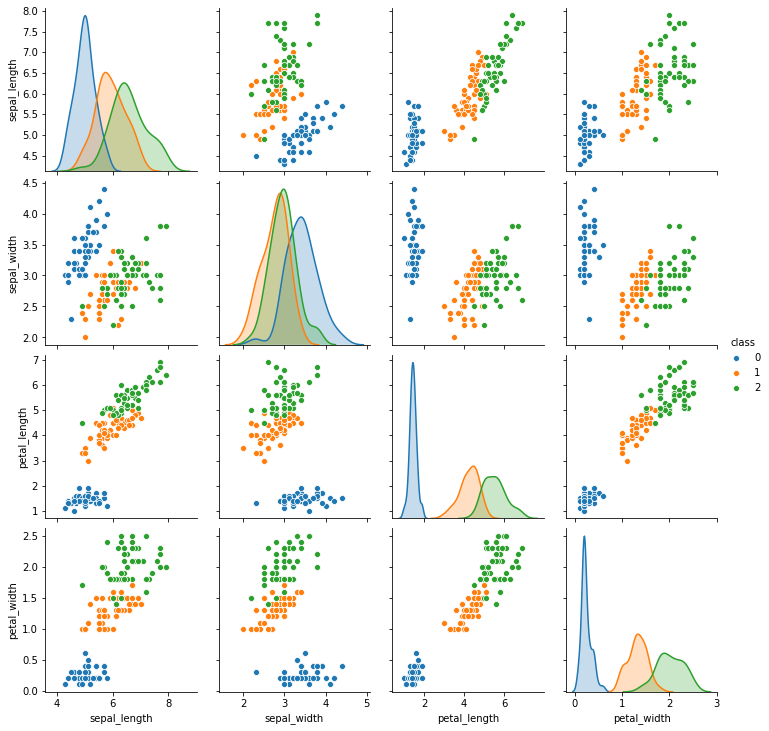

In [170]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(data.dropna(),hue="class")

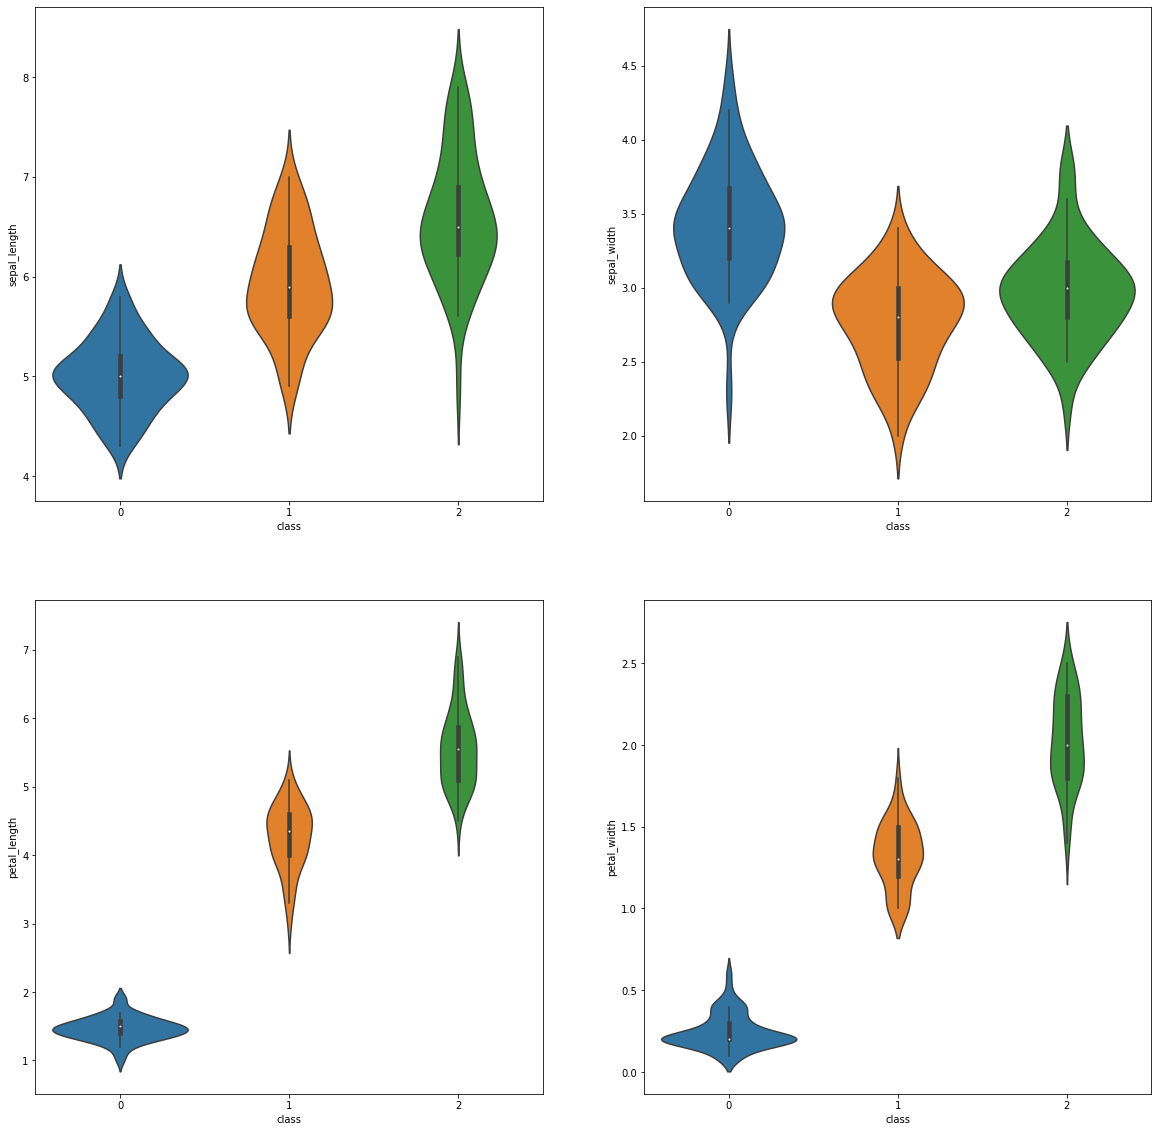

In [171]:
plt.figure(figsize=(20, 20))
for column_index, column in enumerate(data.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=data)

In [3]:
from sklearn.model_selection import train_test_split

input_data = data[["sepal_length","sepal_width","petal_length","petal_width"]]
input_class =  data["class"]

train_data,test_data,train_class,test_class = train_test_split(input_data,input_class,random_state = 14)

In [4]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=14)
decision_tree.fit(train_data,train_class)
predict_class = decision_tree.predict(test_data)
predict_score = np.mean(predict_class == test_class)
print("预测的准确度为{}".format(predict_score))

预测的准确度为0.9736842105263158


In [7]:
from sklearn.tree import export_graphviz
with open("tree.dot",'w') as f:
    export_graphviz(decision_tree, feature_names =['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], out_file = f)

In [5]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree,input_data,input_class,scoring='accuracy')
print("交叉验证结果: {0:.2f}%".format(np.mean(scores) * 100))

交叉验证结果: 96.67%


In [251]:
from  sklearn.ensemble import RandomForestClassifier
rft = RandomForestClassifier(n_estimators=20,random_state=14)
rft.fit(train_data,train_class)
predict_class = rft.predict(test_data)
predict_score = np.mean(predict_class == test_class)
print("随机森林预测的准确度为{}".format(predict_score))

随机森林预测的准确度为0.9736842105263158


In [252]:
scores = cross_val_score(rft,input_data,input_class,scoring='accuracy')
print("Accuracy: {0:.2f}%".format(np.mean(scores) * 100))

Accuracy: 96.67%


In [259]:
import matplotlib.pyplot as plt
scores = []
for i in range(1,100):
    rft = RandomForestClassifier(n_estimators=i,random_state=14)
    score = cross_val_score(rft,input_data,input_class,scoring='accuracy')
    scores.append(np.mean(score)*100)

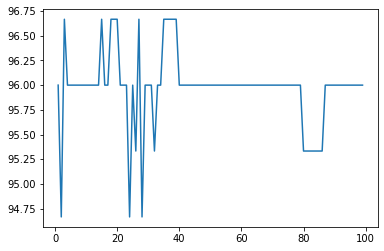

In [260]:
scores
plt.plot(range(1,100),scores)

array([[0.52      , 0.66666667, 0.66666667, 0.66666667],
       [0.78666667, 0.76666667, 0.94666667, 0.93333333],
       [0.87333333, 0.89333333, 0.94666667, 0.96      ],
       [0.91333333, 0.96      , 0.94      , 0.96666667]])

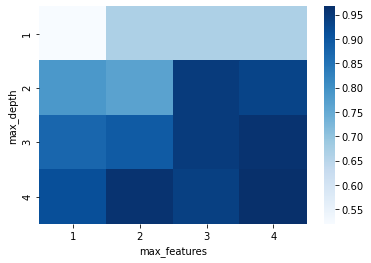

In [113]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sb

scores = []
for j in range(1,5):
    for i in range(1,5):
        decision_tree = DecisionTreeClassifier(max_features=i,max_depth=j,random_state=14)
        score = cross_val_score(decision_tree,input_data,input_class,scoring='accuracy')
        scores.append(np.mean(score))
        
scores = np.array(scores)
scores.shape = (4, 4)

sb.heatmap(scores, cmap='Blues')
plt.xticks(np.arange(0,4)+0.5,np.arange(1,5))
plt.yticks(np.arange(0,4)+0.5,np.arange(1,5))
# plt.yticks(np)
plt.xlabel('max_features')
plt.ylabel('max_depth')
scores